In [ ]:
!pip install yfinance hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.5 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
<ipython-input-3-6a27d3a36122>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Hidden State'] = hidden_states


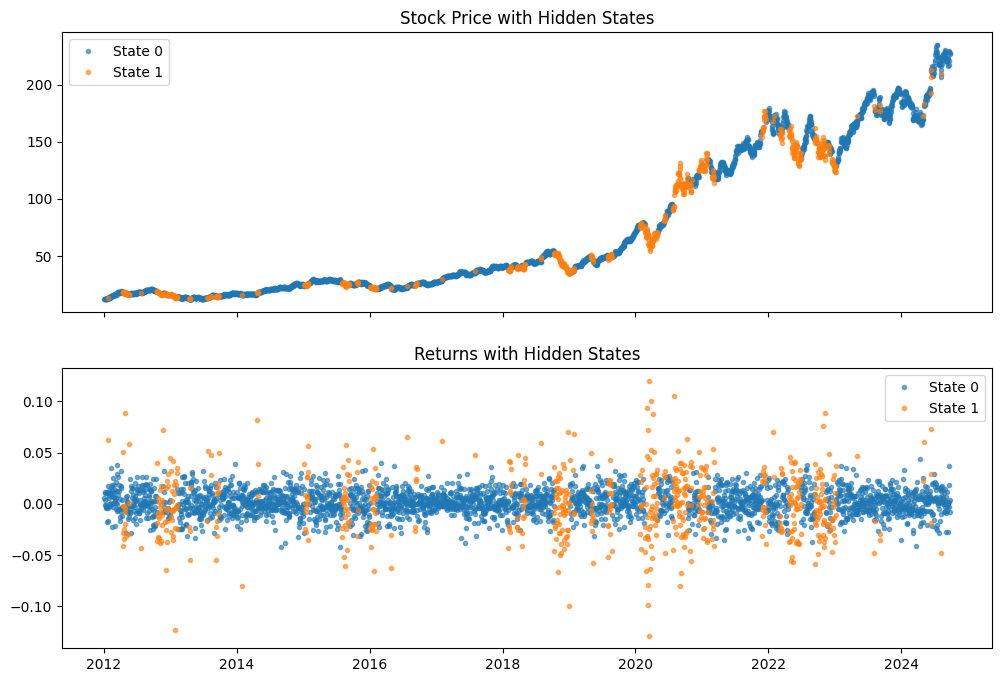

Transition matrix between hidden states:
[[0.95478332 0.04521668]
 [0.14642857 0.85357143]]

Means and Variances of hidden states:
Hidden State 0:
Mean = 0.0015159896751634212
Variance = 0.00014468359528423081

Hidden State 1:
Mean = -0.0003865106745983909
Variance = 0.0008979210692531147



In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from datetime import datetime


# Part 1: Data Collection and Preprocessing
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()
    return stock_data.dropna()


# Part 2: Fitting the Gaussian Hidden Markov Model
def fit_hmm_model(returns, num_states=2):
    # Reshaping returns to be a 2D array as hmmlearn requires
    returns_reshaped = returns.reshape(-1, 1)

    # Gaussian HMM
    model = GaussianHMM(n_components=num_states, covariance_type='diag', n_iter=1000)
    model.fit(returns_reshaped)

    # Predict hidden states
    hidden_states = model.predict(returns_reshaped)

    return model, hidden_states


# Part 3: Visualization of Hidden States
def plot_hidden_states(stock_data, hidden_states, num_states):
    fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)

    stock_data['Hidden State'] = hidden_states

    # Plot stock price with hidden state coloring
    for state in range(num_states):
        idx = stock_data['Hidden State'] == state
        ax[0].plot(stock_data.index[idx], stock_data['Adj Close'][idx], '.', label=f"State {state}", alpha=0.6)

    ax[0].set_title('Stock Price with Hidden States')
    ax[0].legend()

    # Plot returns with hidden state coloring
    for state in range(num_states):
        idx = stock_data['Hidden State'] == state
        ax[1].plot(stock_data.index[idx], stock_data['Returns'][idx], '.', label=f"State {state}", alpha=0.6)

    ax[1].set_title('Returns with Hidden States')
    ax[1].legend()

    plt.show()


# Part 4: Transition Matrix and State Interpretation
def print_model_details(model, num_states):
    # Transition matrix
    print("Transition matrix between hidden states:")
    print(model.transmat_)

    # Mean and variance for each hidden state
    print("\nMeans and Variances of hidden states:")
    for i in range(num_states):
        print(f"Hidden State {i}:")
        print(f"Mean = {model.means_[i][0]}")
        print(f"Variance = {np.diag(model.covars_[i])[0]}")
        print()


# Main execution
    # Set parameters
ticker = "AAPL"  # Example: Apple stock
start_date = "2012-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

    # Part 1: Collect and preprocess data
stock_data = get_stock_data(ticker, start_date, end_date)

    # Part 2: Fit the Gaussian HMM
model, hidden_states = fit_hmm_model(stock_data['Returns'].values, num_states=2)

    # Part 3: Visualize hidden states
plot_hidden_states(stock_data, hidden_states, num_states=2)

    # Part 4: Transition matrix and state details
print_model_details(model, num_states=2)